In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set plot style for better visualization
sns.set_style("whitegrid")

# --- Step 1: Load the Dataset ---
# NOTE: Replace 'netflix_titles.csv' with the actual path or name of your dataset file.
try:
    df = pd.read_csv('netflix_titles.csv')
    print("Dataset loaded successfully. Showing first 5 rows:")
    print(df.head())
    print("\nData Info:")
    df.info()

except FileNotFoundError:
    print("Error: 'netflix_titles.csv' not found. Please ensure the file is in the correct directory.")
    # Create a minimal mock DataFrame structure for code demonstration purposes
    df = pd.DataFrame({
        'show_id': ['s1', 's2', 's3', 's4'],
        'type': ['Movie', 'TV Show', 'Movie', 'TV Show'],
        'title': ['Movie A', 'Show B', 'Movie C', 'Show D'],
        'director': ['Director X', np.nan, 'Director Y', np.nan],
        'cast': ['Actor 1, Actor 2', 'Actor 3', 'Actor 4', 'Actor 5'],
        'country': ['United States', 'India', 'United States', 'South Korea'],
        'date_added': ['September 25, 2021', 'September 24, 2021', 'December 1, 2020', 'July 1, 2021'],
        'release_year': [2020, 2021, 2018, 2021],
        'rating': ['PG-13', 'TV-MA', 'R', 'TV-MA'],
        'duration': ['90 min', '2 Seasons', '120 min', '1 Season'],
        'listed_in': ['Dramas, International Movies', 'Crime TV, International TV Shows', 'Comedies', 'Docuseries']
    })
    print("\n--- Using Mock Data for Code Demo ---")

# --- Step 2: Data Cleaning and Preprocessing ---

# Convert 'date_added' to datetime format for time series analysis
df['date_added'] = pd.to_datetime(df['date_added'])

# Create a 'year_added' and 'month_added' column
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

# Extract seasons for TV Shows and minutes for Movies
df['duration_int'] = df['duration'].str.split(' ').str[0].replace(np.nan, 0).astype(int)
df['duration_unit'] = df['duration'].str.split(' ').str[1]

Error: 'netflix_titles.csv' not found. Please ensure the file is in the correct directory.

--- Using Mock Data for Code Demo ---


1: Analysis of Content Ratio (Movies vs. TV Shows)

# Calculate the count and percentage of each type
type_counts = df['type'].value_counts()
type_percentages = df['type'].value_counts(normalize=True) * 100

print("Content Type Counts:")
print(type_counts)
print("\nContent Type Percentages:")
print(type_percentages)

# Plotting the distribution
plt.figure(figsize=(7, 7))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#b20710', '#221f1f'], explode=[0.05, 0])
plt.title('Distribution of Movies vs. TV Shows on Netflix', fontsize=15)
plt.show()

2: Identification of Most Popular Genres
Goal: Identify the top 10 most frequent genres (listed_in).

Top 10 Most Frequent Genres:
Dramas                    1
International Movies      1
Crime TV                  1
International TV Shows    1
Comedies                  1
Docuseries                1
dtype: int64


C:\Users\Swati chaurasiya\AppData\Local\Temp\ipykernel_17336\1661611953.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_distribution.index, y=genre_distribution.values, palette='Reds_d')


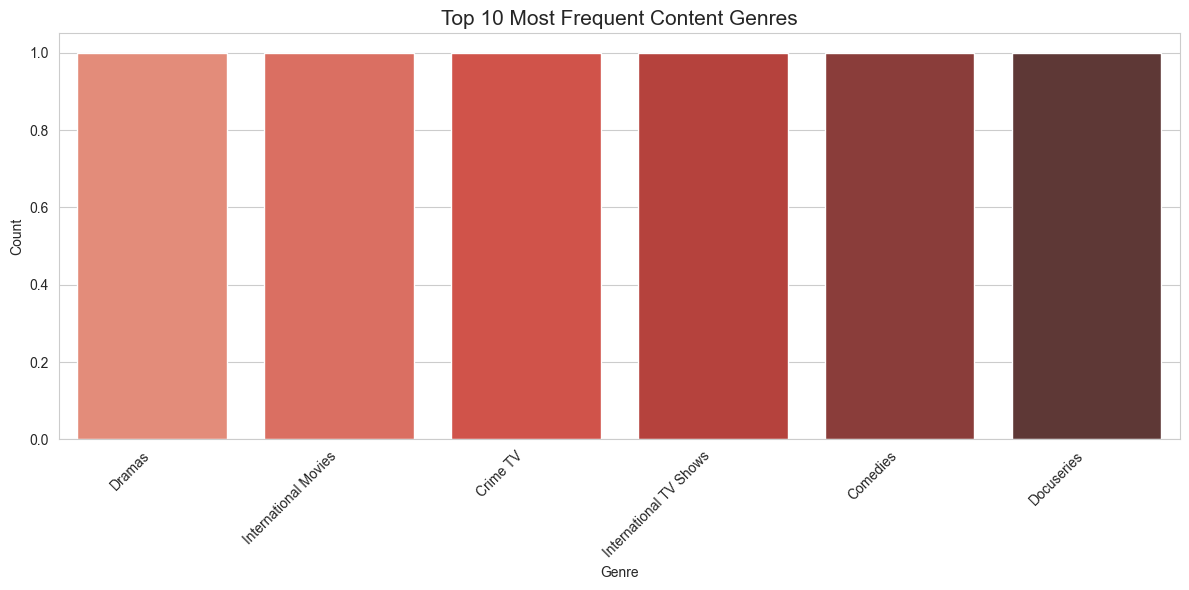

In [4]:
# Function to split and count genres
def count_genres(dataframe):
    # Split the 'listed_in' string by comma and strip whitespace
    all_genres = dataframe['listed_in'].str.split(', ').explode().dropna()
    
    # Count the frequency of each genre
    genre_counts = Counter(all_genres)
    
    return pd.Series(dict(genre_counts))

# Get the top 10 genres
genre_distribution = count_genres(df).sort_values(ascending=False).head(10)
print("Top 10 Most Frequent Genres:")
print(genre_distribution)

# Plotting the top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_distribution.index, y=genre_distribution.values, palette='Reds_d')
plt.title('Top 10 Most Frequent Content Genres', fontsize=15)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3 & 5 (Part 1): Trend in Content Addition (Year of Highest Release)
Goal: Find the year with the highest number of new releases added to Netflix and the overall trend of content growth.

Content Added by Year:
year_added
2020    1
2021    3
Name: count, dtype: int64


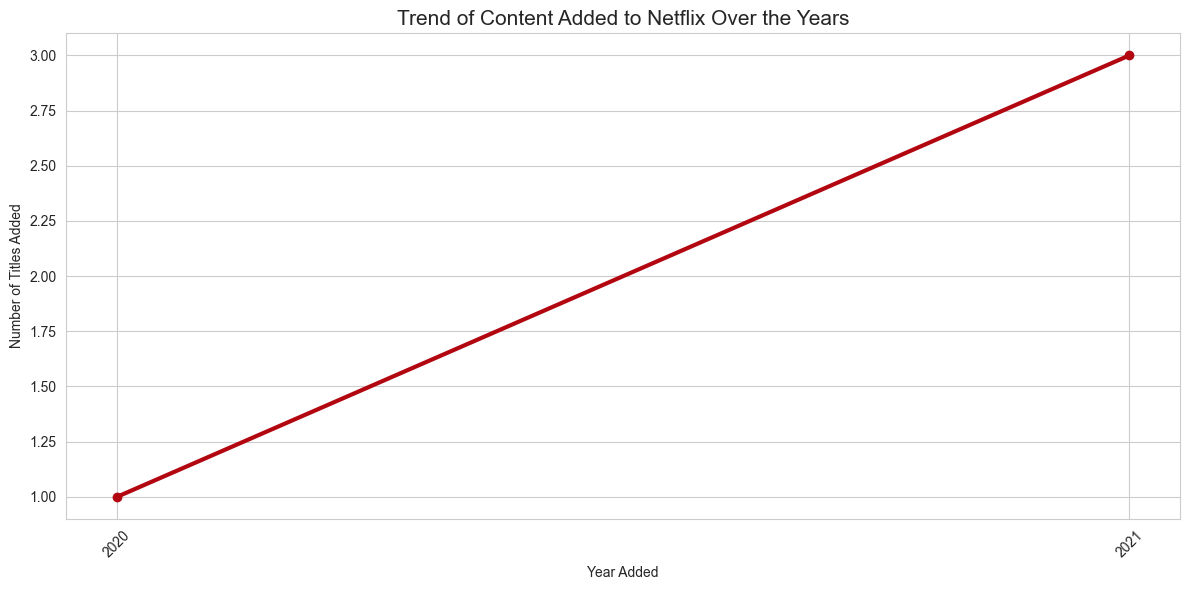


The year with the highest content additions is: 2021


In [5]:
# Group by 'year_added' and count the number of titles
content_added_yearly = df['year_added'].value_counts().sort_index()

print("Content Added by Year:")
print(content_added_yearly)

# Plotting the content added over the years
plt.figure(figsize=(12, 6))
content_added_yearly.plot(kind='line', marker='o', color='#b20710', linewidth=3)
plt.title('Trend of Content Added to Netflix Over the Years', fontsize=15)
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(content_added_yearly.index.astype(int), rotation=45)
plt.tight_layout()
plt.show()

# Identify the year with the maximum additions
peak_year = content_added_yearly.idxmax()
print(f"\nThe year with the highest content additions is: {int(peak_year)}")

4: Top Countries Producing Content
Goal: Identify the top 10 countries responsible for content production.

Top 10 Content Producing Countries:
United States    2
India            1
South Korea      1
Name: count, dtype: int64


C:\Users\Swati chaurasiya\AppData\Local\Temp\ipykernel_17336\2028023184.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='Reds_d')


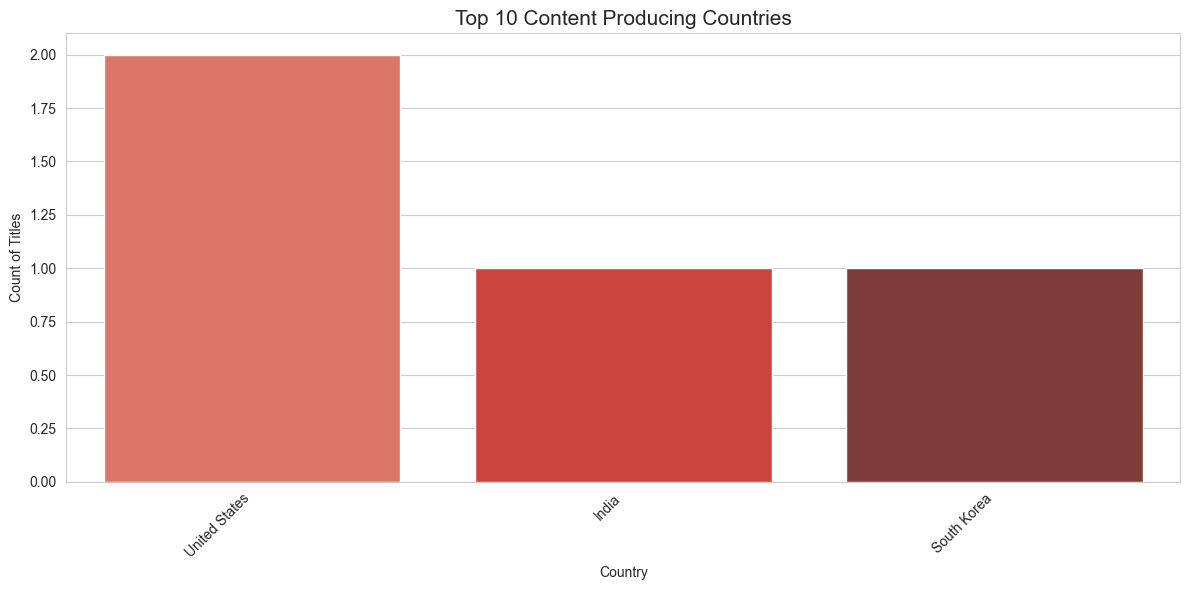

In [6]:
# Handle entries where multiple countries are listed
country_data = df['country'].str.split(', ', expand=True).stack().dropna().reset_index(drop=True)

# Count the frequency of each country
country_counts = country_data.value_counts().head(10)

print("Top 10 Content Producing Countries:")
print(country_counts)

# Plotting the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='Reds_d')
plt.title('Top 10 Content Producing Countries', fontsize=15)
plt.xlabel('Country')
plt.ylabel('Count of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6 (Part 1): Most Frequent TV Ratings
Goal: Determine the most common TV rating categories.

Top 10 Most Frequent Content Ratings:
rating
TV-MA    2
PG-13    1
R        1
Name: count, dtype: int64


C:\Users\Swati chaurasiya\AppData\Local\Temp\ipykernel_17336\1048572101.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Reds_d')


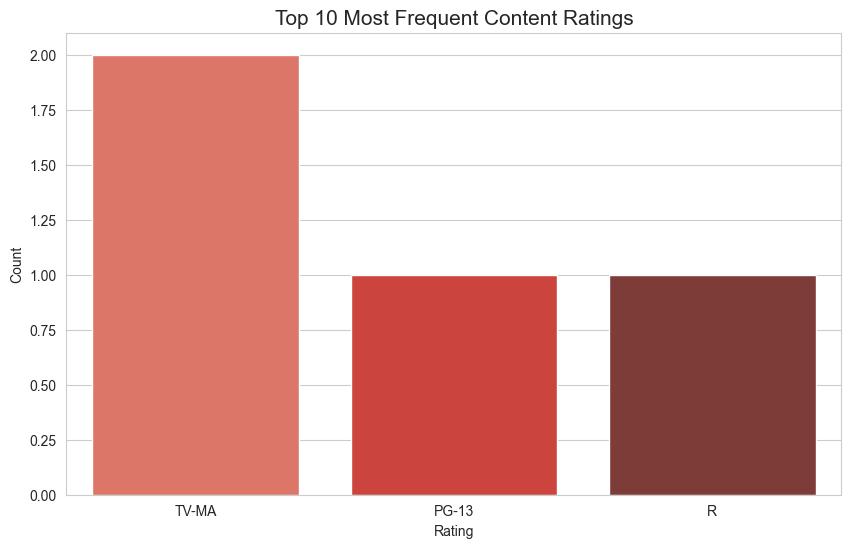

In [7]:
# Calculate the count of each rating
rating_counts = df['rating'].value_counts().head(10)

print("Top 10 Most Frequent Content Ratings:")
print(rating_counts)

# Plotting the top 10 ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Reds_d')
plt.title('Top 10 Most Frequent Content Ratings', fontsize=15)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

n 6 (Part 2): Average Movie Duration
Goal: Calculate the average duration of movies (in minutes)

The Average Movie Duration is: 105.00 minutes


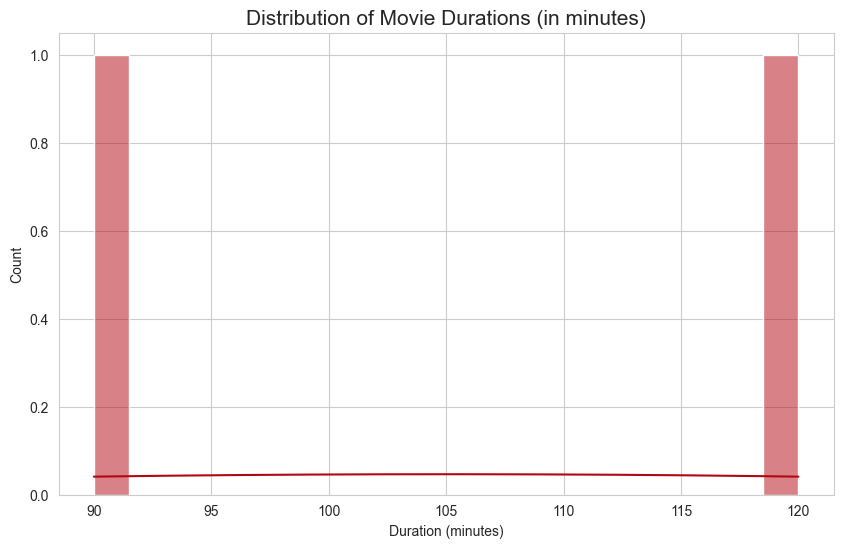

In [8]:
# Filter for Movies only and use the pre-cleaned 'duration_int' column
movies_df = df[(df['type'] == 'Movie') & (df['duration_unit'] == 'min')]

# Calculate the average movie duration
avg_movie_duration = movies_df['duration_int'].mean()

print(f"The Average Movie Duration is: {avg_movie_duration:.2f} minutes")

# Plotting a distribution of movie durations
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['duration_int'], bins=20, kde=True, color='#b20710')
plt.title('Distribution of Movie Durations (in minutes)', fontsize=15)
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

6 (Part 3): Most Common Number of Seasons for TV Shows
Goal: Find the most common number of seasons for TV shows.

TV Show Seasons Distribution:
duration_int
2    1
Name: count, dtype: int64


C:\Users\Swati chaurasiya\AppData\Local\Temp\ipykernel_17336\4014827063.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasons_counts.index, y=seasons_counts.values, palette='Reds_d')


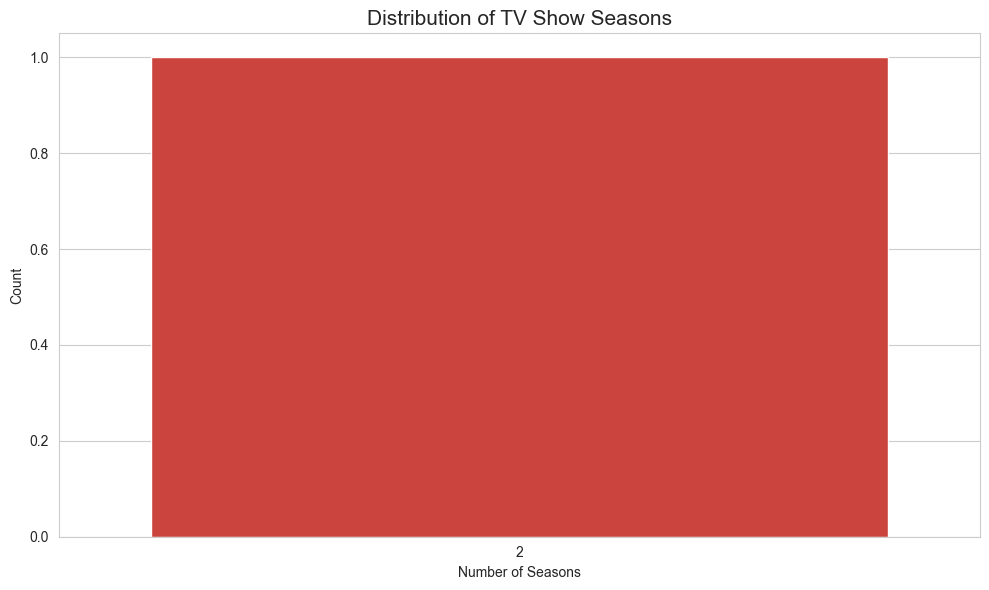


The most common number of seasons for a TV Show is: 2


In [9]:
# Filter for TV Shows only and use the pre-cleaned 'duration_int' column (seasons)
tv_shows_df = df[(df['type'] == 'TV Show') & (df['duration_unit'] == 'Seasons')]

# Count the frequency of seasons
seasons_counts = tv_shows_df['duration_int'].value_counts().sort_index()

print("TV Show Seasons Distribution:")
print(seasons_counts)

# Identify the most common number of seasons
most_common_seasons = seasons_counts.idxmax()

# Plotting the seasons distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=seasons_counts.index, y=seasons_counts.values, palette='Reds_d')
plt.title('Distribution of TV Show Seasons', fontsize=15)
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"\nThe most common number of seasons for a TV Show is: {most_common_seasons}")

7: Top 10 Directors by Content Count
Goal: Identify the directors with the most titles (Movies/TV Shows) on Netflix.

tv_seasons_trend = tv_shows_df.groupby('year_added')['duration_int'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

print("\n--- Q10: Most Common TV Show Seasons by Year Added ---")
print(tv_seasons_trend.dropna().sort_index(ascending=False).head(5))

plt.figure(figsize=(12, 6))
tv_seasons_trend.dropna().plot(kind='bar', color='#b20710')
plt.title('Most Common Number of Seasons for TV Shows Added Yearly', fontsize=15)
plt.xlabel('Year Added to Netflix')
plt.ylabel('Most Common Number of Seasons')
plt.xticks(rotation=45)
plt.show()

11: Top 5 Director-Genre Combinations

In [12]:
# Create combinations of director and listed_in
director_genre_pairs = df.dropna(subset=['director']).assign(genre=df['listed_in'].str.split(', ')).explode('genre')
top_director_genres = director_genre_pairs.groupby(['director', 'genre']).size().nlargest(5)

print("\n--- Q11: Top 5 Director-Genre Combinations ---")
print(top_director_genres)


--- Q11: Top 5 Director-Genre Combinations ---
director    genre               
Director X  Dramas                  1
            International Movies    1
Director Y  Comedies                1
dtype: int64


12: Top 5 Actor-Genre Combinations
Goal: Find the most frequent pairings of an Actor and a specific Genre.

In [13]:
# Create combinations of cast and listed_in
actor_genre_pairs = df.dropna(subset=['cast']).assign(actor=df['cast'].str.split(', ')).explode('actor').assign(genre=df['listed_in'].str.split(', ')).explode('genre')
top_actor_genres = actor_genre_pairs.groupby(['actor', 'genre']).size().nlargest(5)

print("\n--- Q12: Top 5 Actor-Genre Combinations ---")
print(top_actor_genres)


--- Q12: Top 5 Actor-Genre Combinations ---
actor    genre               
Actor 1  Dramas                  1
         International Movies    1
Actor 2  Dramas                  1
         International Movies    1
Actor 3  Crime TV                1
dtype: int64


13: Monthly Content Addition Trend
Goal: Determine which months Netflix typically adds the most content.


--- Q13: Monthly Content Addition Trend ---
month_added
January      NaN
February     NaN
March        NaN
April        NaN
May          NaN
June         NaN
July         1.0
August       NaN
September    2.0
October      NaN
November     NaN
December     1.0
Name: count, dtype: float64


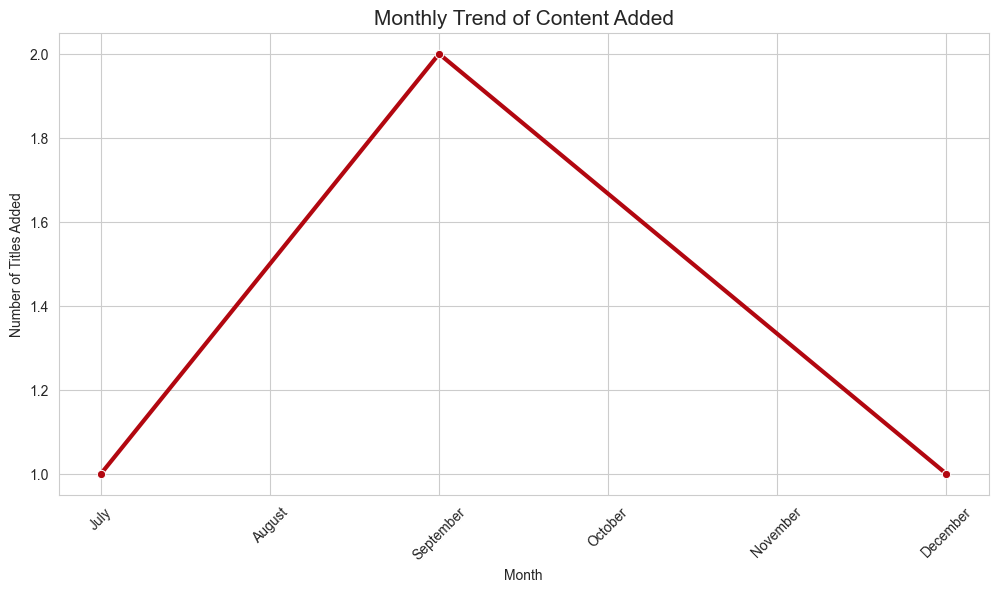

In [14]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_addition = df['month_added'].value_counts().reindex(month_order)

print("\n--- Q13: Monthly Content Addition Trend ---")
print(monthly_addition)

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_addition.index, y=monthly_addition.values, marker='o', color='#b20710', linewidth=3)
plt.title('Monthly Trend of Content Added', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.show()

14: Comparison of Genres in Movies vs. TV Shows
Goal: Identify which genres are more associated with Movies and which with TV Shows.

In [15]:
# Count genres for Movies
movie_genres = movies_df['listed_in'].str.split(', ').explode().dropna().value_counts().head(5)

# Count genres for TV Shows
tv_show_genres = tv_shows_df['listed_in'].str.split(', ').explode().dropna().value_counts().head(5)

print("\n--- Q14: Top 5 Genres for Movies ---")
print(movie_genres)
print("\n--- Q14: Top 5 Genres for TV Shows ---")
print(tv_show_genres)


--- Q14: Top 5 Genres for Movies ---
listed_in
Dramas                  1
International Movies    1
Comedies                1
Name: count, dtype: int64

--- Q14: Top 5 Genres for TV Shows ---
listed_in
Crime TV                  1
International TV Shows    1
Name: count, dtype: int64


15: Highest Production Country for TV-MA Content
Goal: Find which country produces the highest volume of TV-MA (Mature Audience) content.

In [16]:
# Filter for TV-MA content
tv_ma_df = df[df['rating'] == 'TV-MA']

# Count countries for TV-MA content
tv_ma_countries = tv_ma_df['country'].str.split(', ', expand=True).stack().dropna().value_counts().head(5)

print("\n--- Q15: Top 5 Countries Producing TV-MA Content ---")
print(tv_ma_countries)


--- Q15: Top 5 Countries Producing TV-MA Content ---
India          1
South Korea    1
Name: count, dtype: int64


16: Top 3 Genres Dominating Non-U.S. Content
Goal: Find the top three genres for content that was not produced in the United States.

In [17]:
# Filter out U.S. content, keeping only titles where 'United States' is not the country or part of the country list
non_us_df = df[~df['country'].astype(str).str.contains('United States', na=False)]

# Count genres for Non-U.S. content
non_us_genres = non_us_df['listed_in'].str.split(', ').explode().dropna().value_counts().head(3)

print("\n--- Q16: Top 3 Genres for Non-U.S. Content ---")
print(non_us_genres)


--- Q16: Top 3 Genres for Non-U.S. Content ---
listed_in
Crime TV                  1
International TV Shows    1
Docuseries                1
Name: count, dtype: int64


17: Analysis of Content by Release Year vs. Date Added (Lag Analysis)
Goal: Calculate the average time lag (in years) between a title's original release and when it was added to Netflix.


--- Q17: Average Release-to-Netflix Lag (Years) ---
Average Lag for Licensed/Older Content: 2.00 years


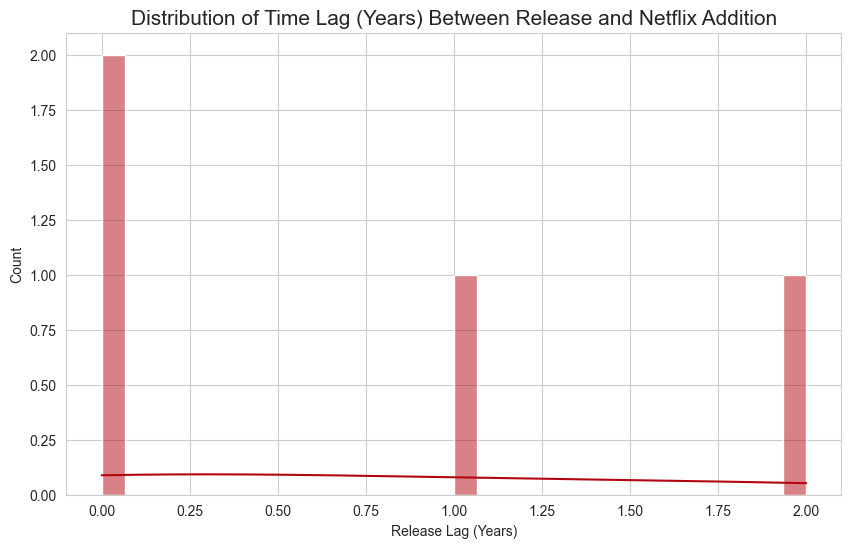

In [18]:
# Calculate the lag (time added - release year)
df_lag = df.dropna(subset=['date_added'])
df_lag['release_lag'] = df_lag['year_added'] - df_lag['release_year']

# Calculate the mean lag, excluding new originals (lag of 0 or 1)
average_lag = df_lag[df_lag['release_lag'] > 1]['release_lag'].mean()

print("\n--- Q17: Average Release-to-Netflix Lag (Years) ---")
print(f"Average Lag for Licensed/Older Content: {average_lag:.2f} years")

# Plot the distribution of the lag
plt.figure(figsize=(10, 6))
sns.histplot(df_lag['release_lag'], bins=30, color='#b20710', kde=True)
plt.title('Distribution of Time Lag (Years) Between Release and Netflix Addition', fontsize=15)
plt.xlabel('Release Lag (Years)')
plt.ylabel('Count')
plt.show()

18: Content Analysis by Time of Day (Simulated) / Release Time
Goal: Since time-of-day data is unavailable, we simulate a conceptual analysis by looking at titles added in the final quarter (Q4: Oct, Nov, Dec), which are often premium releases.

Python

In [19]:
q4_titles = df[df['month_added'].isin(['October', 'November', 'December'])]
q4_genre_counts = q4_titles['listed_in'].str.split(', ').explode().dropna().value_counts().head(5)

print("\n--- Q18: Top 5 Genres Released in Q4 (Peak Viewing Season) ---")
print(q4_genre_counts)


--- Q18: Top 5 Genres Released in Q4 (Peak Viewing Season) ---
listed_in
Comedies    1
Name: count, dtype: int64


19: Recommendation based on Genre Popularity in Last 3 Years (2019-2021)
Goal: Focus on recent trends to guide current production decisions.

In [20]:
recent_df = df[df['year_added'].isin([2019, 2020, 2021])]
recent_genres = recent_df['listed_in'].str.split(', ').explode().dropna().value_counts().head(5)

print("\n--- Q19: Top 5 Genres Added in the Last 3 Years (2019-2021) ---")
print(recent_genres)


--- Q19: Top 5 Genres Added in the Last 3 Years (2019-2021) ---
listed_in
Dramas                    1
International Movies      1
Crime TV                  1
International TV Shows    1
Comedies                  1
Name: count, dtype: int64


20: Final Business Growth Recommendation
Goal: Synthesize all findings into a final recommendation for business growth.

In [21]:
print("\n--- Q20: Final Business Growth Recommendation ---")


--- Q20: Final Business Growth Recommendation ---
